In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator

In [2]:
categories=["absent","present"]
IMG_SIZE = 150

In [3]:
def create_data(datadir):
    data=[]
    for category in categories:  
        path = os.path.join(datadir,category) 
        class_num = categories.index(category)  
        for k,img in enumerate(tqdm(os.listdir(path))):
            if k>2499:
                break
            x=os.path.join(path,img)
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            data.append([new_array, class_num]) 
    return data

def data_split(data):
    x,y=list(),list()
    for features,labels in data:
        x.append(features)
        y.append(labels)
    return [x,y]

def preprocess(x,y):
    X=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    y=np.array(y)
    return [X,y]

In [4]:
traindir='/kaggle/input/xrayimgs/train'
testdir='/kaggle/input/xrayimgs/test'
validdir='/kaggle/input/xrayimgs/valid'

training_data=create_data(traindir)
testing_data=create_data(testdir)
validate_data=create_data(validdir)

print('Training Data Count:',len(training_data))
print('Testing Data Count:',len(testing_data))
print('Validation Data Count:',len(validate_data))

X_train, y_train = data_split(training_data)
X_test, y_test = data_split(testing_data)
X_valid, y_valid = data_split(validate_data)

X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
X_valid, y_valid = preprocess(X_valid, y_valid)

X_train= X_train/255.0
X_test= X_test/255.0
X_valid= X_valid/255.0

 74%|███████▍  | 2500/3377 [00:14<00:04, 177.85it/s]


Training Data Count: 5000
Testing Data Count: 4693
Validation Data Count: 4581


In [5]:
model=Sequential()


model.add(Conv2D(32,(3,3), activation= 'relu', padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
          

model.add(Conv2D(128,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
          

model.add(Conv2D(256,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), activation= 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dropout(0.5))
          
          
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.6))       
model.add(Dense(2))
          
          
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(3e-4),
              metrics=['accuracy'])

In [6]:
record = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_valid,y_valid),
    
)

Epoch 1/30
40/40 [==============================] - 25s 326ms/step - loss: 1.4408 - accuracy: 0.5484 - val_loss: 1.1393 - val_accuracy: 0.4543
Epoch 2/30
40/40 [==============================] - 9s 223ms/step - loss: 0.6016 - accuracy: 0.6552 - val_loss: 1.9393 - val_accuracy: 0.4543
Epoch 3/30
40/40 [==============================] - 9s 223ms/step - loss: 0.5497 - accuracy: 0.6948 - val_loss: 2.0610 - val_accuracy: 0.4543
Epoch 4/30
40/40 [==============================] - 9s 222ms/step - loss: 0.5103 - accuracy: 0.7300 - val_loss: 1.1889 - val_accuracy: 0.4543
Epoch 5/30
40/40 [==============================] - 8s 196ms/step - loss: 0.4649 - accuracy: 0.7618 - val_loss: 1.6918 - val_accuracy: 0.5457
Epoch 6/30
40/40 [==============================] - 9s 224ms/step - loss: 0.4144 - accuracy: 0.8010 - val_loss: 2.7540 - val_accuracy: 0.5457
Epoch 7/30
40/40 [==============================] - 9s 222ms/step - loss: 0.4068 - accuracy: 0.8042 - val_loss: 5.0765 - val_accuracy: 0.5457
Epoch

In [7]:
loss=record.history['loss']
val_loss=record.history['val_loss']
acc=record.history['accuracy']
val_acc=record.history['val_accuracy']
epochs=range(1,len(loss)+1)

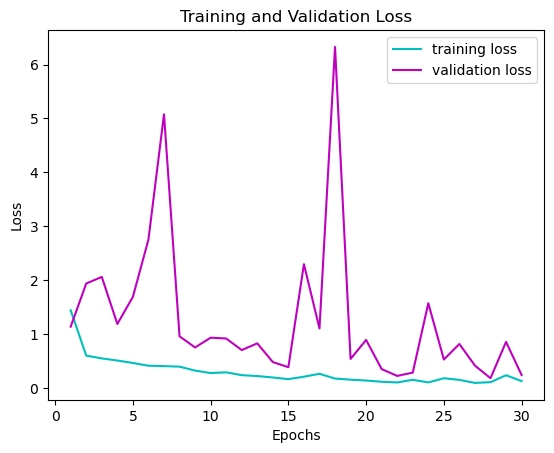

In [8]:
plt.plot(epochs,loss,'c',label="training loss")
plt.plot(epochs,val_loss,'m',label="validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

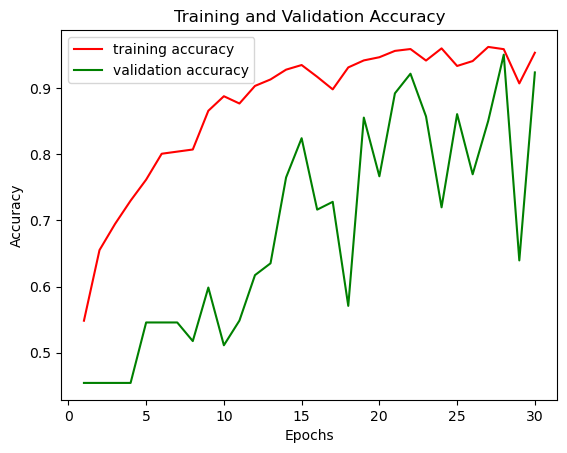

In [9]:
plt.plot(epochs,acc,'r',label="training accuracy")
plt.plot(epochs,val_acc,'g',label="validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
loss,accu=model.evaluate(X_test,y_test)
print("Accuracy : ",accu)
print("Loss     : ",loss)

147/147 [==============================] - 3s 15ms/step - loss: 1.9607 - accuracy: 0.5632
Accuracy :  0.5631791949272156
Loss     :  1.9607212543487549


In [11]:
model.save('model', save_format='h5')